In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("../input/creditcardfraud/creditcard.csv")
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


# Expoloratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Calculate summary statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


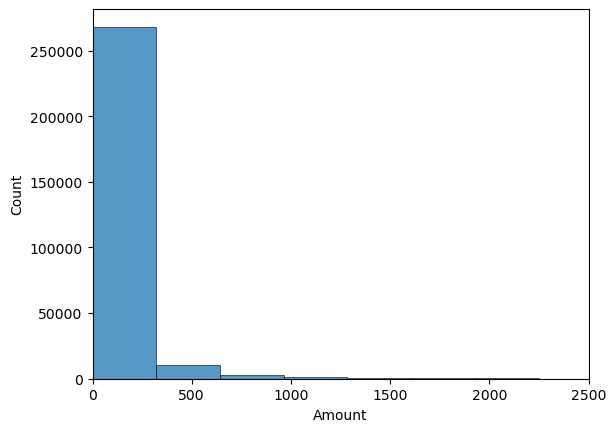

In [5]:
# Histogram - Distribution Of "amount" Column
sns.histplot(df["Amount"], bins=80)
plt.xlabel("Amount")
plt.ylabel("Count")
plt.xlim(0,2500)
plt.show()

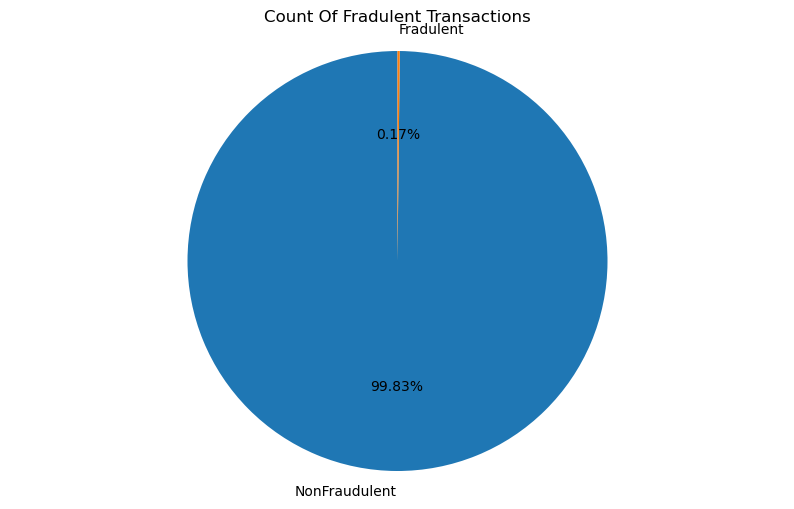

In [6]:
# Pie Chart - Count Of Fradulent Transactions

plt.figure(figsize=(10, 6))
labels=["NonFraudulent", "Fradulent"]
colors = ['#1f77b4', "#ff7f0e"]
sizes=df["Class"].value_counts()
plt.pie(sizes, labels=labels, autopct="%1.2f%%", startangle=90, colors=colors)
plt.title("Count Of Fradulent Transactions")
plt.axis('equal')
plt.show()

## Spliting The Data

In [7]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X=df.drop("Class", axis=1)
y=df["Class"]
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)

In [8]:
# Training the model on the training data
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
# The warning message we received indicates that the logistic regression model did not converge within the default number of iterations. Lets scale the data first and see if it will fix the problem
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [10]:
# Training the model on the scaled training data

model.fit(X_train_scaled, y_train)

LogisticRegression()

In [11]:
# Predicting using scaled testing data using the same scaler

X_test_scaled= scaler.transform(X_test)
y_pred=model.predict(X_test_scaled)

## analyze and evaluate the predictions

In [12]:
# calculating the accuracy
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9991222218320986


In [13]:
# Other metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
cm= confusion_matrix(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)

print("The confusion matrix is: ", cm)
print("The precision is: ", precision)
print("The recall is: ", recall)
print("The f1 score is: ",f1)



The confusion matrix is:  [[56855     9]
 [   41    57]]
The precision is:  0.8636363636363636
The recall is:  0.5816326530612245
The f1 score is:  0.6951219512195121


## Adressing the classe inbalance issue

In [14]:
# Using SMOTE oversampling
from imblearn.over_sampling import SMOTE

# Aplly SMOTE over-sampling
smote= SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled=smote.fit_resample(X_train_scaled, y_train)

# Check the class distribution after oversampling

print(y_train_oversampled.value_counts())

0    227451
1    227451
Name: Class, dtype: int64


In [15]:
# Training the model with oversampled data
model.fit(X_train_oversampled,y_train_oversampled)

LogisticRegression()

In [16]:
# Predicting using scaled testing data using the same scaler (again)
y_pred= model.predict(X_test_scaled)

## analyze and evaluate the predictions 2

In [17]:
# Other metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

accuracy= accuracy_score(y_test, y_pred)
cm= confusion_matrix(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)

print("accuracy is: ", accuracy)
print("The confusion matrix is: ", cm)
print("The precision is: ", precision)
print("The recall is: ", recall)
print("The f1 score is: ",f1)

accuracy is:  0.9745970998209332
The confusion matrix is:  [[55425  1439]
 [    8    90]]
The precision is:  0.058862001308044476
The recall is:  0.9183673469387755
The f1 score is:  0.11063306699446836


## Hyperparameter Tuning

In [18]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune

hyperparameters={'penalty': ['l1', 'l2'], 'C': [ 0.01,0.1, 1],'solver': ['liblinear']}
# Create the Grid Search Object
grid_search= GridSearchCV(model,hyperparameters, scoring='f1',cv=4, n_jobs=-1)


In [19]:
# Perform the hyperparameter tuning

subset_size=100000
X_subset=X_train_oversampled[:subset_size]
y_subset=y_train_oversampled[:subset_size]

grid_search.fit(X_subset, y_subset)

# Get the best hyperparameters and model

best_params=grid_search.best_params_
best_model=grid_search.best_estimator_

In [20]:
# Evaluate the best model on the test set
y_pred=best_model.predict(X_test_scaled)

In [21]:
# Evaluate the best model

accuracy= accuracy_score(y_test, y_pred)
cm= confusion_matrix(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)

print("accuracy is: ", accuracy)
print("The confusion matrix is: ", cm)
print("The precision is: ", precision)
print("The recall is: ", recall)
print("The f1 score is: ",f1)

accuracy is:  0.9991222218320986
The confusion matrix is:  [[56854    10]
 [   40    58]]
The precision is:  0.8529411764705882
The recall is:  0.5918367346938775
The f1 score is:  0.6987951807228915


**The results show**
*  56854 represents the true negatives 
*  10 represents the false positives
*  40 represents the false negatives
*  58 represents the true positives 

In [22]:
# Calculating predicted probabilities
predicted_probabilities=model.predict_proba(X_test_scaled)[:,1]

### True Positive Rate against False Positive Rate

In [23]:
# The ROC curve
from sklearn.metrics import roc_curve , roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, tresholds = roc_curve(y_test, predicted_probabilities)

# Compute the Area Under the Curve (AUC)
auc= roc_auc_score(y_test, predicted_probabilities)

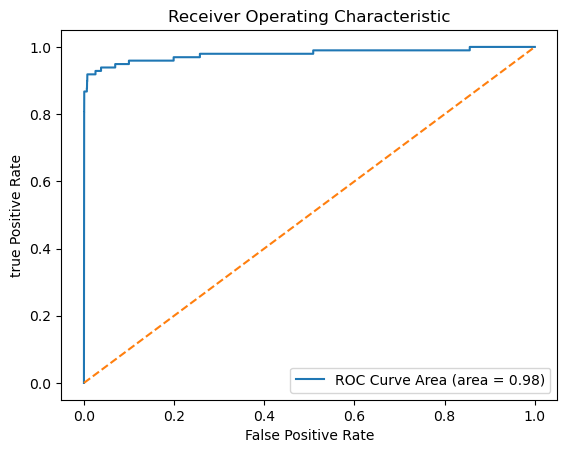

In [24]:
# Plot The ROC Curve
plt.plot(fpr, tpr, label= 'ROC Curve Area (area = %0.2f)' %auc)
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('true Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

In [25]:
# Calculate precision and recall values

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds= precision_recall_curve(y_test, predicted_probabilities)

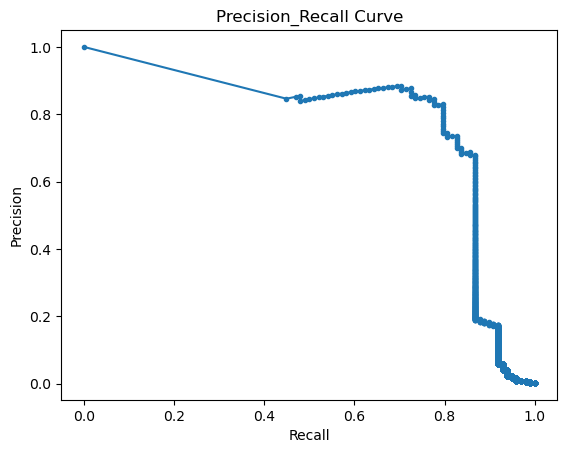

In [26]:
# Plot precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision_Recall Curve')
plt.show()

## Bar Charts Comparing Actual And Predicted Values

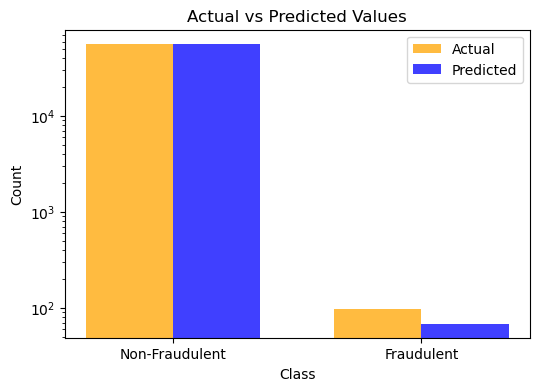

In [27]:
labels= ['Non-Fraudulent', 'Fraudulent']
color= ['orange','blue']

x=np.arange(len(labels))
plt.figure(figsize=(6,4))

bar_width=0.35

# Calculate the counts of actual and predicted values
actual_counts= np.bincount(y_test)
predicted_counts= np.bincount(y_pred)

# Create a bar chart for the actual values
plt.bar(x - bar_width/2, actual_counts, width=bar_width, label='Actual', alpha=0.75, color=color[0])

# Create a bar chart for the predicted values
plt.bar(x + bar_width/2, predicted_counts, width=bar_width, label='Predicted', alpha=0.75, color=color[1])

plt.xlabel('Class')
plt.yscale('log')
plt.ylabel('Count')
plt.title('Actual vs Predicted Values')
plt.xticks(x, labels)
plt.legend()
plt.show()
